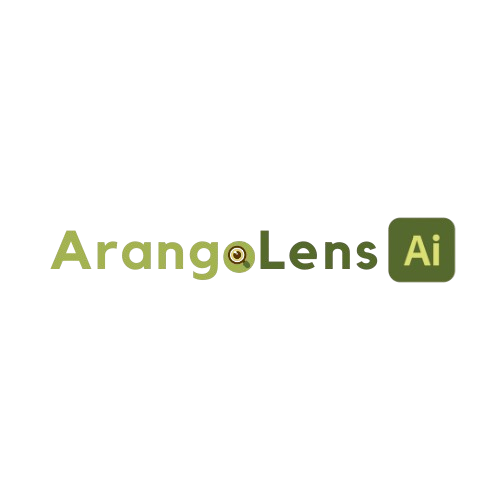
<style type="text/css">
    img {
        width: 250px;
    }
</style>
# About the Project: ArangoLens AI 🌟
---

The project was inspired by the growing need for intelligent crime analysis systems in metropolitan areas. With crime data being generated at massive scales, law enforcement agencies require advanced systems that can not only store and retrieve information but also reason and generate meaningful insights.  

The Chicago Crime Records Dataset provided a rich, real-world dataset to explore how GraphRAG could revolutionize crime data analytics. Our objective was to leverage:  
✅ GraphRAG (Graph-based Retrieval-Augmented Generation)  
✅ GPU-accelerated graph analytics  

By combining these, we built an Agentic Application capable of answering natural language queries related to crimes, criminals, locations, and other connected information with high precision. 

Youtube: https://www.youtube.com/watch?v=IMOZaz1qz-I

# Pre-Processing of Data

### Step 0: Install Required Dependencies

In [2]:
!pip install kaggle
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.5 MB/s eta 0:00:00


### Step 1: Download Dataset from Kaggle

In [4]:
!kaggle datasets download -d utkarshx27/crimes-2001-to-present
!unzip crimes-2001-to-present.zip -d crimes_data

Dataset URL: https://www.kaggle.com/datasets/utkarshx27/crimes-2001-to-present
License(s): U.S. Government Works
100% 439M/439M [00:15<00:00, 32.7MB/s]
100% 439M/439M [00:15<00:00, 30.4MB/s]
Archive:  crimes-2001-to-present.zip
  inflating: crimes_data/Crimes_-_2001_to_Present.csv  


In [6]:
import pandas as pd

file_path = "/content/crimes_data/Crimes_-_2001_to_Present.csv"

# Load the latest version
df = pd.read_csv(file_path, nrows=1000000)

df = df.dropna(subset=["Case Number","Location", "Location Description", "Block", "Primary Type", "Date"])

df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"


### Step 2: Add Synthetic data

In [7]:
import random
from faker import Faker

# Initialize Faker
fake = Faker()

# Generate a pool of unique names
num_unique_names = 10000
unique_names = [fake.name() for _ in range(num_unique_names)]

# Add synthetic criminal columns
df["Criminal"] = [random.choice(unique_names) for _ in range(len(df))]

# Save the modified DataFrame to a new CSV file
df.to_csv("/content/crimes_data/chicago_crime_data_with_names.csv", index=False)

print("Synthetic criminal names added. Data saved to 'crime_data_with_names.csv'.")

df.head()

Synthetic criminal names added. Data saved to 'crime_data_with_names.csv'.


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Criminal
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",Christopher Davis
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",Matthew Carlson
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",Martin Irwin
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",Mercedes Roberts
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)",Ryan Harris


# Converting Data to Graph

### Step 0: Install Required Dependencies

If you are running this notebook on GPU only then set the env variable NX_CUGRAPH_AUTOCONFIG=True else comment it out

In [101]:
!pip install nx-cugraph-cu12 --extra-index-url https://pypi.nvidia.com
%env NX_CUGRAPH_AUTOCONFIG=True

import networkx as nx
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
env: NX_CUGRAPH_AUTOCONFIG=True


### Step 1: Convert the Data to Graph

In [9]:
G = nx.Graph()

df_sample = df.sample(n=70000, random_state=42)

for _, row in df_sample.iterrows():
    # Extract basic information
    crime_id = str(row["ID"])
    location = row.get("Block", "Unknown")
    crime_type = row.get("Primary Type", "Unknown")
    criminal = row.get("Criminal", "Unknown")
    district = str(row.get("District", "Unknown"))
    on_date = str(row.get("Date", "Unknown"))
    hour = str(int(pd.to_datetime(on_date).hour))

    # Add nodes
    G.add_node(crime_id, _key=crime_id, type="crime", crime_id=crime_id)
    G.add_node(location, _key=location, type="location", location=location)
    G.add_node(crime_type, _key=crime_type, type="crime_type", crime_type=crime_type)
    G.add_node(on_date, _key=on_date, type="date", date=on_date)
    G.add_node(hour, _key=hour, type="hour", hour=hour)
    G.add_node(criminal, _key=criminal, type="criminal", name=criminal)
    G.add_node(district, _key=district, type="district", district=district)

    # Add edges
    G.add_edge(crime_id, location, _key=f"{crime_id}_to_{location}", relationship="located_at")
    G.add_edge(crime_id, crime_type, _key=f"{crime_id}_to_{crime_type}", relationship="is_type")
    G.add_edge(crime_id, hour, _key=f"{crime_id}_to_{hour}", relationship="occurred_at_hour")
    G.add_edge(crime_id, on_date, _key=f"{crime_id}_to_{on_date}", relationship="occurred_on_date")
    G.add_edge(crime_id, criminal, _key=f"{crime_id}_to_{criminal}", relationship="involved_criminal")
    G.add_edge(crime_id, district, _key=f"{crime_id}_to_{district}", relationship="located_in_district")

print(G)

Graph with 160458 nodes and 420000 edges


### Step 2: Perform Validations on Graph

In [10]:
nx.config.warnings_to_ignore.add("cache")

# Check number of connected components
num_components = nx.number_connected_components(G)
print(f"Number of connected components: {num_components}")

# Get the size of the largest component
largest_component = max(nx.connected_components(G), key=len)
print(f"Size of the largest component: {len(largest_component)}")

Number of connected components: 1
Size of the largest component: 160458


In [11]:
degree_centrality = nx.degree_centrality(G)
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top nodes by degree centrality:")
for node, centrality in top_nodes:
    print(f"Node {node}: {centrality:.4f}")

Top nodes by degree centrality:
Node THEFT: 0.1020
Node BATTERY: 0.0816
Node CRIMINAL DAMAGE: 0.0484
Node 11.0: 0.0309
Node ASSAULT: 0.0302


# Persist/Load Data into ArangoDB

### Step 0: Install Required Dependencies

In [1]:
!pip install nx-arangodb

import nx_arangodb as nxadb
from arango import ArangoClient

[11:23:29 +0000] [INFO]: NetworkX-cuGraph is available.
INFO:nx_arangodb:NetworkX-cuGraph is available.


### Step 1: Initialize the ArangoDB Database Connection

In [3]:
db = ArangoClient(hosts="https://73ce0db96f7c.arangodb.cloud:8529").db(username="root", password="QeQok2gA0cCq3rbj4zug", verify=True)
print(db)

<StandardDatabase _system>


### Step 2: Persist Data in ArangoDB Database

In [10]:
nxadb.Graph(
    name="ArangoLensCrimeData",
    db=db,
    incoming_graph_data=G,
    overwrite_graph=True,
    write_batch_size=160000
)

[11:28:10 +0000] [INFO]: Graph 'ArangoLensCrimeData' created.
INFO:nx_arangodb:Graph 'ArangoLensCrimeData' created.
[2025/03/09 11:28:10 +0000] [23879] [INFO] - adbnx_adapter: Instantiated ADBNX_Adapter with database '_system'
INFO:adbnx_adapter:Instantiated ADBNX_Adapter with database '_system'


Output()

Output()

[2025/03/09 11:28:22 +0000] [23879] [INFO] - adbnx_adapter: Created ArangoDB 'ArangoLensCrimeData' Graph
INFO:adbnx_adapter:Created ArangoDB 'ArangoLensCrimeData' Graph


### Step 3: Get The Stored Graph

In [14]:
G_adb = nxadb.Graph(name="ArangoLensCrimeData", db=db)
print(G_adb)

[11:29:27 +0000] [INFO]: Graph 'ArangoLensCrimeData' exists.
INFO:nx_arangodb:Graph 'ArangoLensCrimeData' exists.
[11:29:27 +0000] [INFO]: Default node type set to 'ArangoLensCrimeData_node'
INFO:nx_arangodb:Default node type set to 'ArangoLensCrimeData_node'


Graph named 'ArangoLensCrimeData' with 160458 nodes and 420000 edges


# Visualization for Sample of the Graph

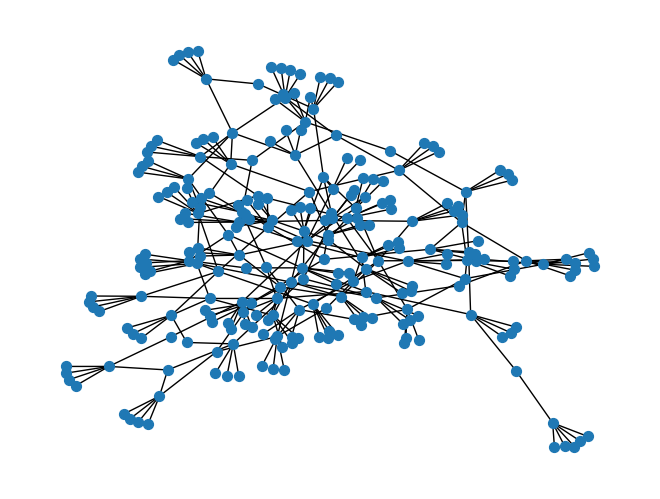

In [26]:
# Create a subgraph of the first 200 nodes
subgraph = G.subgraph(list(G.nodes)[:250])

# Draw the subgraph
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=False, node_size=50, font_size=8)
plt.show()

# LangGraph Agent Implementation

### Step 0: Setup Credentials for AWS Bedrock

In [1]:
import os

config_file = "/content/config"
os.environ['AWS_CONFIG_FILE'] = config_file

credentials_file = "/content/credentials"
os.environ['AWS_SHARED_CREDENTIALS_FILE'] = credentials_file

### Step 1: Install Required Dependencies

In [3]:
!pip install boto3
!pip install --upgrade langchain langchain-community langchain-openai langgraph langchain_aws

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.3/109.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.19
    Uninstalling lang

### Step 2: Check for Presence of GPU

In [4]:
!nvidia-smi
!nvcc --version

Sun Mar  9 11:51:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Step 3: Import Required Modules

In [5]:
import numpy as np
import re
import boto3
import cudf
from langchain_community.graphs import ArangoGraph
from langchain_community.tools import tool
from langchain_aws import ChatBedrock
from langchain.tools import Tool
from langchain_core.prompts import PromptTemplate, SystemMessagePromptTemplate
from langchain_community.chains.graph_qa.arangodb import ArangoGraphQAChain
from langgraph.prebuilt import create_react_agent

### Step 4: Initialize LangChain Compatible ArangoGraph

In [8]:
arango_graph = ArangoGraph(db)

### Step 5: Define Prompts

In [93]:
GRAPH_SCHEMA = f"""
This is a Chicago Crime Network stored in ArangoDB, with the following node and edge types:

Schema of the graph in db:
{arango_graph.schema}


**Nodes**:
- crime (type='crime', property crime_id)
- location (type='location', property location)
- crime_type (type='crime_type', property crime_type) (property crime_type provides the type of crime)
- date (type='date', property date)
- hour (type='hour', property hour [0-23])
- criminal (type='criminal', property name) (property name has the name of the criminal)
- district (type='district', property district)

**Edges**
- crime <-> location (relationship='located_at') (Gives the location where the crime occured)
- crime <-> crime_type (relationship='is_type') (Gives the types of crimes)
- crime <-> hour (relationship='occurred_at_hour') (Gives the hour when the crime occured)
- crime <-> date (relationship='occurred_on_date') (Gives the date when the crime occured)
- crime <-> criminal (relationship='involved_criminal') (Gives the criminal involved in the crime)
- crime <-> district (relationship='located_in_district') (Gives the specific district of a crime)


Important Rules:
1. Do NOT invent fields or relationships outside this schema.
2. All values are strings, except 'hour' is a string of 0-23.
""".replace("{", "{{").replace("}", "}}")


system_message = f"""
You are a **Criminal Tracking & Analysis Agent** using ArangoDB and NetworkX.

**Primary Goal**:
- Use ArangoDB AQL queries or NetworkX code to answer user questions about the crime network.

**Rules**:
1. Reference the provided graph schema. Do NOT invent fields.
2. For AQL, produce well-structured queries referencing correct collections/nodes.
3. For NetworkX, produce Python code with `FINAL_RESULT`.
4. If the user requests a specific number of results, use `LIMIT`.
5. When you encounter INBOUND or OUTBOUND and get an empty result then please try all the combinations of INBOUND and OUTBOUND


In case of hybrid queries follow this sequence:
- Get the filtered data using AQL
- Use this data in the cuGraph code.

**Graph Schema**:
{GRAPH_SCHEMA}

Respond to user queries with the minimal steps required.
Stop once you provide a single, valid result.

Give detailed response and use proper formatting(using bullet points). Make sure to include the results in your output.
"""

networkx_prompt = """
** THERE SHOULD BE NO TEXT IN THE OUTPUT, JUST CODE **

1. ONLY provide python code that I can directly execute via `exec()`. Do not provide any instructions.
2. Code must reference `G_adb` if needed.
3. Use only `networkx (nx)`, no cugraph or cudf. nx is already available so no need to import.
4. Store the final result in `FINAL_RESULT`.
5. Use the correct algorithm

Query: user_query

Python Code:
"""

### Step 6: Initialize AWS Bedrock Client and LLM

In [95]:
bedrock_client = boto3.client('bedrock-runtime', region_name='us-west-2')
llm = ChatBedrock(model_id="us.anthropic.claude-3-5-sonnet-20241022-v2:0", client=bedrock_client, model_kwargs={
        "max_tokens": 10000,
        "temperature": 0,
        "system": system_message
    })

### Step 6: Define Tools For LangGraph Agent

In [96]:
def text_to_aql(query: str) -> str:
    """Converts natural language to AQL and executes it in ArangoDB."""

    print("Executing AQL Query...")

    chain = ArangoGraphQAChain.from_llm(
        llm=llm,
        graph=arango_graph,
        verbose=True,
        allow_dangerous_requests=True,
    )


    result = chain.invoke(query)
    return str(result["result"])


def text_to_nxcugraph(query: str) -> str:
    """Uses nx-cugraph to analyze the crime graph."""

    print("Executing cuGraph Query...")

    graph_analysis_code = llm.invoke(networkx_prompt.replace("user_query", query))
    print("------")
    print("CuGraph Output: " + str(graph_analysis_code))
    print("------")
    graph_analysis_code =  graph_analysis_code.content

    # Strip triple backticks if present
    cleaned_code = re.sub(r"^```python\n|```$", "", graph_analysis_code, flags=re.MULTILINE).strip()

    print(f"Python Code: \n\n {cleaned_code}")

    global_vars = {"G_adb": G_adb, "nx": nx, "cudf": cudf}
    local_vars = {}

    try:
        exec(cleaned_code, global_vars, local_vars)
        return local_vars.get("FINAL_RESULT", "No result found.")
    except Exception as e:
        return f"Error executing cuGraph code: {e}"

### Step 7: Initialize LangGraph Agent

In [97]:
tools = [
    Tool(name="AQLQuery", func=text_to_aql, description="Executes AQL queries in ArangoDB."),
    Tool(name="cuGraphQuery", func=text_to_nxcugraph, description="Performs GPU-accelerated graph analysis.")
]


agent = create_react_agent(model=llm, tools=tools)


def query_graph(query: str) -> str:
    """Runs a query through the agent."""
    return agent.invoke({"messages": [{"role": "user", "content": query}]})

# Query the Agent

A) User Query resulting in AQL Lookup

In [50]:
user_query = "Give me the locations where criminal Michael Smith has committed the crime?"
response = query_graph(user_query)
print(response["messages"][-2].content + response["messages"][-1].content)

Executing AQL Query...


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH ArangoLensCrimeData_node, ArangoLensCrimeData_node_to_ArangoLensCrimeData_node
FOR criminal IN ArangoLensCrimeData_node
    FILTER criminal.type == 'criminal' AND criminal.name == 'Michael Smith'
    FOR crime IN OUTBOUND criminal ArangoLensCrimeData_node_to_ArangoLensCrimeData_node
        FILTER crime.type == 'crime'
        FOR location IN OUTBOUND crime ArangoLensCrimeData_node_to_ArangoLensCrimeData_node
            FILTER location.type == 'location'
            RETURN DISTINCT location.location

AQL Result:
['016XX N KEELER AV', '014XX E 74TH ST', '048XX W KAMERLING AVE', '077XX S HOMAN AVE', '067XX S ASHLAND AV', '015XX E 86TH PL', '078XX S WOLCOTT AVE', '015XX W 87TH ST', '025XX N CAMPBELL AVE', '111XX S AVENUE F']

> Finished chain.
Summary:
Based on the criminal records, Michael Smith has been involved in crimes at multiple locations across Chicago. The crimes were committed at various add

B) User Query resulting in Hybrid Lookup

In [107]:
user_query = "What is the shortest path between criminal Michael Smith and Thomas Johnson "
response = query_graph(user_query)
print(response["messages"][-1].content)

Executing AQL Query...


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH ArangoLensCrimeData_node
FOR criminal IN ArangoLensCrimeData_node
    FILTER criminal.type == 'criminal' 
    AND (criminal.name == 'Michael Smith' OR criminal.name == 'Thomas Johnson')
RETURN {name: criminal.name, _id: criminal._id}

AQL Result:
[{'name': 'Thomas Johnson', '_id': 'ArangoLensCrimeData_node/25'}, {'name': 'Michael Smith', '_id': 'ArangoLensCrimeData_node/898'}]

> Finished chain.
Executing cuGraph Query...
------
CuGraph Output: content="source_id = 'ArangoLensCrimeData_node/898'\ntarget_id = 'ArangoLensCrimeData_node/25'\n\ntry:\n    path = nx.shortest_path(G_adb, source=source_id, target=target_id)\n    FINAL_RESULT = path\nexcept nx.NetworkXNoPath:\n    FINAL_RESULT = []" additional_kwargs={'usage': {'prompt_tokens': 1350, 'completion_tokens': 101, 'total_tokens': 1451}, 'stop_reason': 'end_turn', 'thinking': {}, 'model_id': 'us.anthropic.claude-3-5-sonnet-20241022-v2:0'} response

# UI via Gradio

In [108]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [110]:
def gradio_query(query: str) -> str:
  res = query_graph(query)
  return res["messages"][-1].content

In [ ]:
import gradio as gr

gr.Interface(fn=gradio_query, inputs="text", outputs="text").launch(share=True)

In [ ]:
# Additional Queries:

"Find all crimes committed by Thomas Smith and show related locations and crime types."
"Who are the top 5 criminals with the most connections in the crime network?"
"Show the timeline of crimes in District 10 over the past year."
"Find the shortest path between John Doe and Mark Lewis in the crime network."
"Detect hidden criminal communities within the network."
"Which locations have the highest crime density?"
"What is the most common crime type reported between 2 AM and 5 AM?"
"Predict potential crime locations based on past crime trends."
"Identify all criminals indirectly connected to Thomas Johnson within 2 degrees."
"Show all criminals linked to robbery cases in the past 6 months."

## 🔮 What's Next for ArangoLensAI?  

- 📊 Advanced Path Analysis – Identifying criminal networks and co-occurrence patterns.  

- 📊 Generating Interactive Graphs – Based on results generating user interactive graphs

- ⏳ Real-Time Querying – Integrating streaming data pipelines for live crime analysis.  

# THANK YOU 🙏 
### Team ArangoLens AI (Aishwarya and Nikhil)